<a href="https://colab.research.google.com/github/edcr09/project_3_da_python/blob/main/Project_3_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos


## Plan de solución

- Importar libreria pandas, numphy y pyplot desde matplotlib para todo el proyecto.
- Proceder a leer los DataFrames con la función de pandas .read_csv
- Usar .info() en cada DataFrame para conocer información relevante de cada uno.


In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Leer conjuntos de datos en los DataFrames

insta_orders_url = 'https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/instacart_orders.csv'
products_url = 'https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/products.csv'
aisles_url = 'https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/aisles.csv'
departments_url = 'https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/departments.csv'
order_products_url = 'https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/order_products.csv'

df_insta_orders = pd.read_csv(insta_orders_url, sep=';')
df_products = pd.read_csv(products_url, sep=';')
df_aisles = pd.read_csv(aisles_url, sep=';')
df_dept = pd.read_csv(departments_url, sep=';')
df_order_products = pd.read_csv(order_products_url, sep=';')

In [ ]:
# Mostrar información del DataFrame
df_insta_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [ ]:
# Mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
# Mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
# Nostrar información del DataFrame
df_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
# Mostrar información del DataFrame
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Observaciones

Revisando la información de cada DataFrame:
- Cada DataFrame tiene diferente rango de indices.
    
- Varía la cantidad de columnas en cada DataFrame. Había antes algo anomalo en las columnas, porque mostraba tener solo una cada DF, pero era porque no se vio que el separador es ';' .Diferente al separador por default ','. Se corrigió.

- Los DataFrames df_aisles y df_dept no tienen datos nulos, df_insta_orders y df_products si tienen datos nulos en 1 columna. df_order_products no proporcionaba esta información del conteo de datos non-null, por ello se le agregó 'show_counts=True' al llamar a .info() para visualizar la información del conteo non-null, donde add_tocart_order tiene valores ausentes.


    

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.



## Plan de solución

Para verificar los tipos de datos:
- Con .info() a cada DataFrame se observa que las columnas de ID son datos tipo int64, por lo tanto son numeros enteros.


Para identificar y completar valores ausentes:
- Usar .isna() en los DataFrame para hallar los datos ausentes en las columnas halladas con .info() con datos ausentes, y con ello filtar y obtener un DataFrame con filas de valores ausentes.
- Completar los datos ausentes con .fillna(), .replace()

Para identificar y eliminar valores duplicados:
- Usar .duplicated() en los DataFrame para hallar filas duplicadas
- Verificar que si son duplicados verdaderos o engañosos, dependiendo de la información que refleja cada columna.
- Eliminar duplicados verdaderos con .drop_duplicates().


## Encontrar y eliminar los valores duplicados.

### `orders` data frame

In [ ]:
# Revisa si hay pedidos duplicados

orders_duplicated = df_insta_orders[df_insta_orders.duplicated()]
display( orders_duplicated )

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Hay filas duplicadas y tienen en común el día de la semana y hora del día en que se realizó el pedido (columnas: 'order_dow' y  'order_hour_of_day', respectivamente)


In [ ]:
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

insta_orders_wed_2am = df_insta_orders.query( " order_dow == 3 & order_hour_of_day == 2 " )

display(insta_orders_wed_2am)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Hay 121 pedidos que se realizaron el miercoles a las 2:00 AM


In [ ]:
# Elimina los pedidos duplicados

df_insta_orders.drop_duplicates(inplace = True)


In [ ]:
# Vuelve a verificar si hay filas duplicadas

print( df_insta_orders[ df_insta_orders.duplicated() ] )


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [ ]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

duplicated_id = df_insta_orders[ df_insta_orders['order_id'].duplicated() ]

print(duplicated_id)
print()
display(df_insta_orders.query( " order_dow == 3 & order_hour_of_day == 2 " ))


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Se encontraron filas duplicadas en el DataFrame de los pedidos en Instacar (df_instacar_orders), fueron 15 filas duplicadas que se eliminaron y se verificó mostrando nuevamente el DataFrame df_instacar_orders donde en vez de mostrar 121 filas antes de la eliminación de duplicados, ahora muestra 106 filas, posterior a la eliminación de las filas duplicadas. También aportó a esto la verificación mediante el order_id, ya que estos valores son únicos y no deberían repetirse, ya que cada fila debe representar una orden diferente.


### `products` data frame

In [ ]:
# Verifica si hay filas totalmente duplicadas

products_duplicated = df_products[ df_products.duplicated() ]

print(products_duplicated)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [ ]:
# Verifica únicamente si hay IDs duplicadas de productos

print ( df_products[df_products['product_id'].duplicated() ] )

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [ ]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

df_products['product_name'].str.upper()

display ( df_products[ df_products['product_name'].duplicated() ] )


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes

duplic_prod_name_NaN_df = df_products[ df_products['product_name'].duplicated() ]

print( duplic_prod_name_NaN_df[ ~(duplic_prod_name_NaN_df['product_name'].isna() ) ] )

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


No se hallaron filas duplicadas en el DataFrame de products (df_products), tampoco se hallaron IDs duplicados de productos. En el caso de los duplicados de nombres de productos (product_name), no se hallaron duplicados verdaderos, si no duplicados de valores ausentes, que no son duplicados verdaderos, incluso se verificó que no hubieran duplicados no ausentes, pero hubo ninguno. Otra manera en que se verificó esto último fue con la información de df_products.info() que nos indica que para la columna df_products hay 1258 valores ausentes, lo cual coincide con lo que comprobamos con la funcion .duplicated(), 1 valor ausente y 1257 valores ausentes duplicados en la columna 'products_name'. Por lo tanto hay 1258 filas sin nombre de producto.


### `departments` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas

departments_duplicated = df_dept[df_dept.duplicated()]

print( departments_duplicated )

Empty DataFrame
Columns: [department_id, department]
Index: []


In [ ]:
# Revisa únicamente si hay IDs duplicadas de departamentos (no productos)

duplic_dept_id = df_dept[df_dept['department_id'].duplicated()]

print(duplic_dept_id)


Empty DataFrame
Columns: [department_id, department]
Index: []


No se hallaron filas duplicadas ni id duplicados de departamentos (department_id) en el DataFrame df_dept


### `aisles` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas

aisles_duplicated = df_aisles[df_aisles.duplicated()]

print( aisles_duplicated )


Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [ ]:
# Revisa únicamente si hay IDs duplicadas de aisles (no productos)

duplic_aisle_id = df_aisles[df_aisles['aisle_id'].duplicated()]

print( duplic_aisle_id )


Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


No se hallaron filas duplicadas ni id duplicados de pasillos (aisle_id) en el DataFrame df_aisles


### `order_products` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas

prod_duplicated = df_order_products[df_order_products.duplicated()]

print( prod_duplicated )


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [ ]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

# Verificando duplicados en ID de ordenes
order_id_duplicated = df_order_products[df_order_products['order_id'].duplicated()]

display( order_id_duplicated )
print()
print('Suma de valores duplicados: ')
print( df_order_products['order_id'].duplicated().sum())
print()
print( df_order_products['order_id'].nunique())
print()
display( df_order_products['order_id'].value_counts() )


,order_id,product_id,add_to_cart_order,reordered
367,2867619,48094,9.0,0
824,844425,39408,10.0,1
1124,3319857,37067,19.0,0
1258,1038788,12471,14.0,0
1303,2825714,44632,16.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1



Suma de valores duplicados: 
4094961

450046



61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64

No se hallaron filas duplicadas en el DataFrame de products_order. Pero si en el de id de ordenes, duplicados aunque por lo que representa este DataFrame, no tendría nada de raro ya que son cada producto de las ordenes, por lo tanto pueden estar duplicados los id de orden y de productos, ya que una orden puede tener varios productos, y de acuerdo al DataFrame es una fila por producto de una orden, de la misma forma un id de producto puede estar presente en distintas ordenes.

## Encontrar y eliminar los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encuentra los valores ausentes en la columna 'product_name'

display( df_products[df_products['product_name'].isna()] )
print()
display( df_products.query('product_name.isna() & aisle_id == 100 & department_id == 21'))


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Al buscar los valores con .isna(), encontramos que hay 1258 filas con valores ausentes en la columna product_name, y podría decirse con base en los resultados mostrados que todos estos están relacionados con el pasillo 100 de 'aisle_id' y el dept 21 de 'department_id'. Por lo tanto, se procedió a comprobarlo.


In [ ]:
#  Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100,
# ya que se hizo la verificación con el método .query(), pasandole las condiciones multiples, obteniendo el mismo DataFrame filtrado.

display( df_products.query('product_name.isna() & aisle_id == 100'))

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21



Se realizó la verificación con el método .query(), pasandole las condiciones multiples, obteniendo DataFrames con el mismo numero de filas.

In [ ]:
# Todos los nombres de productos ausentes están relacionados con el departamento con ID 21,
# porque se verificó agregando la condición a las 2 anteriores.

display( df_products.query('product_name.isna() & aisle_id == 100 & department_id == 21'))

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Se realizó la verificación con el método .query(), pasandole 3 condiciones, obteniendo DataFrames de la misma dimension que el DataFrame que solo filtra los valores ausentes.


In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


display(df_aisles[df_aisles['aisle_id'] == 100 ] )
print()
display(df_dept[df_dept['department_id'] == 21 ] )
print()

# Prueba combinando DataFrames

with_dept_name = pd.merge(df_products, df_dept, left_on = ['department_id'], right_on = ['department_id'], how='left')
print()
id_and_dept_data = pd.merge(with_dept_name, df_aisles, left_on = ['aisle_id'], right_on = ['aisle_id'], how='left')
print()

#Utilizando las tablas department y aisles fusionadas en tabla products para mostrar DataFrame con datos del pasillo ID 100
#   y departamento ID 21

display ( id_and_dept_data.query( 'product_name.isna() & aisle_id == 100 & department_id == 21' )  )

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


,product_id,product_name,aisle_id,department_id,department,aisle
37,38,NaN,100,21,missing,missing
71,72,NaN,100,21,missing,missing
109,110,NaN,100,21,missing,missing
296,297,NaN,100,21,missing,missing
416,417,NaN,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,NaN,100,21,missing,missing
49574,49575,NaN,100,21,missing,missing
49640,49641,NaN,100,21,missing,missing
49663,49664,NaN,100,21,missing,missing


Al utilizar las tablas de aisles y departments en sus valores de 100 y 21, respectivamente, se observa que los nombres de departamento y pasillo en las tablas utilizadas en los valores de interes para las columnas 'aisle_id' en df_aisles y 'department_id' en df_dept, son datos ausentes y lo representaron un dato tipo string 'missing'.


In [ ]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products['product_name'].fillna(value= 'Unknown', inplace= True)

display(df_products[df_products['product_name'] == 'Unknown'] )


,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


Aplicación del método .fillna al DataFrame de productos df_products en la columna 'product_name' para sustituir los valores ausentes que previamente se identificaron, después se verificó filtrando el DataFrame para las filas donde el nombre de producto 'product_name' es 'Unknown'.

Igual se podría haber aplicado a todo el DataFrame, ya que de acuerdo con la información de .info(), 'product_name es la unica columna con valores ausentes, asi que no habría afectado a valores de otras columnas, pero considero una buena practica, especificar bien solo en donde se requiere aplicar el cambio, y no arriesgarse a afectar otro dato.


### `orders` data frame

In [ ]:
# Encuentra los valores ausentes

display( df_insta_orders[df_insta_orders['days_since_prior_order'].isna()] )


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

display( df_insta_orders.query( 'days_since_prior_order.isna() & order_number == 1' ) )


# Reemplazar NaN por 0, ya que tiene sentido si es tu primer pedido, han pasado 0 dias desde el 'ultimo'
df_insta_orders['days_since_prior_order'].fillna(value= 0, inplace= True)

display (display( df_insta_orders.query( 'days_since_prior_order ==0 & order_number == 1' )) )

display ( np.array_equal(df_insta_orders['days_since_prior_order'], df_insta_orders['days_since_prior_order'].astype('int')) )
print()
# ---- Ejecutar código antes de convertir.----

# La línea de código anterior resultó 'True', entonces es seguro convertir el tipo de dato float a int.

df_insta_orders['days_since_prior_order'] = df_insta_orders['days_since_prior_order'].astype('int')

df_insta_orders.info()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,0.0
96,787445,25685,1,6,18,0.0
100,294410,111449,1,0,19,0.0
103,2869915,123958,1,4,16,0.0
104,2521921,42286,1,3,18,0.0
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,0.0
478896,2222353,141211,1,2,13,0.0
478922,2272807,204154,1,1,15,0.0
478926,2499542,68810,1,4,19,0.0


None

True


<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  int64
dtypes: int64(6)
memory usage: 25.6 MB


Se encontraron los valores ausentes aplicando el metodo .isna() a la columna 'days_since_prior_order' del DataFrame de las ordenes en instacart (df_insta_orders), se hizo así porque era la columna que de acuerdo con .info(), tiene valores ausentes,
y porque al aplicarlo al data frame directamente y filtrar salía el dataframe df_insta_orders relleno de valores NaN.

Después se realizó un filtrado al DataFrame df_insta_cart con .query() para filas con valores ausentes en la columna 'days_since_prior_order' y que el pedido sea el 1 de cada cliente (order_number == 1).

Con ello se verificó que todos los primeros pedidos de cada cliente tienen valores ausentes para la columna 'days_since_prior_order' que representa los días que han pasado desde la última orden y esta al ser la primera vez que un cliente ordena, tiene sentido, pero fue mejor reemplazarlo por el numero 0, ya que tiene sentido. Y así facilitó la conversión del tipo de dato float a int.

### `order_products` data frame

In [ ]:
# Encuentra los valores ausentes

display ( df_order_products[df_order_products.isna().any(axis=1)] )


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print ('Valores minimos de cada columna del DatFrame df_order_products' )
print ( df_order_products.min() )
print()
print ('Valores maximos de cada columna del DatFrame df_order_products' )
print ( df_order_products.max() )


Valores minimos de cada columna del DatFrame df_order_products
order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64

Valores maximos de cada columna del DatFrame df_order_products
order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64


Se encontraron los valores ausentes aplicando el metodo .isna() al DataFrame df_order_products, al aplicarlo al data frame directamente y filtrar salía el dataframe df_order_products relleno de valores NaN, esto se resolvió agregando .any(axis =1) seguido de .isna(), para encontrar las filas con algún valor ausente. Según el resultado de .info() de este DataFrame, la columna 'add_to_cart_order' es la única con valores ausentes.

Sobre valores max y min, se observa la columna 'reordered' que es  booleana y 'add_to_cart_order' de 1 a 64, esta ultima columna representa el orden en que se fue agregando un producto a la orden.


In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

order_id_with_nan = df_order_products[df_order_products.isna().any(axis=1)]

display ( order_id_with_nan )


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

group_by_ord_id = order_id_with_nan.groupby(['order_id'], dropna= False)

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

display( group_by_ord_id.count())

print('Valores minimos del conteo para cada columna:')
print( group_by_ord_id.count().min() )

# Ninguno de los pedidos ausentes tienen mas de 64 productos.


,product_id,add_to_cart_order,reordered
order_id,,,
9310,1,0,1
61355,63,0,63
102236,31,0,31
129627,5,0,5
165801,6,0,6
...,...,...,...
2999801,6,0,6
3125735,22,0,22
3308010,51,0,51


Valores minimos del conteo para cada columna:
product_id           1
add_to_cart_order    0
reordered            1
dtype: int64


Ninguno de los pedidos ausentes tienen mas de 64 productos.

Se encontraron valores ausentes aplicando .isna() junto con .any(axis=1) al DataFrame df_order_products, con ello se filtró este DataFrame y se guardó en la varibale 'order_id_with_nan', obteniendo 836 columnas con valores ausentes y de acuerdo a la información de .info(), estos valores ausentes estan en la columna 'add_to_cart_order' de df_order_products.

Al agrupar el DataFrame filtrado 'order_id_with_nan' por ID de pedido (columna 'order_id') y aplicarle el método .count() para ver el conteo de product_id, se obtiene que hay 70 order_id únicos que tienen valor ausente en la columna 'add_to_cart_order' y el valor mínimo en el conteo de product_id es de 1, que indica que son ordenes que solo ordenaron 1 producto.

El valor máximo en el conteo de product_id es de 63, por lo tanto ninguno de los pedidos ausentes tienen mas de 64 productos.


In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart_order' con 999 y convierte la columna al tipo entero.

df_order_products['add_to_cart_order'].fillna(value= 999, inplace=True)

# Verificación de reemplazo
display(df_order_products[ df_order_products['add_to_cart_order'] == 999 ])
print()
# Verificación de que no hay valores ausentes
print(df_order_products[df_order_products.isna().any(axis=1)])
print()
# Comprobando si es seguro hacer la conversion de float a int. (según .info(), la columna 'add_to_cart_order') es tipo float)

display ( np.array_equal(df_order_products['add_to_cart_order'], df_order_products['add_to_cart_order'].astype('int')) )
print()
# ---- Ejecutar código antes de convertir.----

# La línea de código anterior resultó 'True', entonces es seguro convertir el tipo de dato float a int.

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')

df_order_products.info(show_counts=True)


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,999.0,0
9926,1968313,43867,999.0,0
14394,2926893,11688,999.0,0
16418,1717990,4142,999.0,0
30114,1959075,42828,999.0,1
...,...,...,...,...
4505662,1800005,7411,999.0,0
4511400,1633337,260,999.0,0
4517562,404157,9517,999.0,0
4534112,1673227,17835,999.0,0



Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []



True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Se reemplazaron los valores ausentes con .fillna() en la columna 'add_to_cart_order' del DataFrame df_order_products por el valor 999, se verificó que esto se haya realizado correctamente.

Para comprobar si era seguro convertir el tipo de dato float de la columna 'add_to_cart_order' a entero(int), se aplicó la función de Numpy: .array_equal(), lo cual nos comprobó que era seguro hacer la conversión y se realizó con éxito, comprobando con .info(show_counts=True) y se observa que ya no hay valores ausentes y el tipo de datos para todas las columnas es entero (int).


### Conclusiones

Conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Se realizó el preprocesamiento de los datos para todos los DataFrames.  Gracias al uso de .info() en los DataFrames se obtuvo información que ayudó en el proceso de preprocesamiento de los datos para verificar si  las columnas de ID son números enteros, tipo de dato int., también para tener una idea de las columnas con valores ausentes, que en el caso de estos DataFrames eran tipo NaN. Y se aplicó filtrado a columnas especificas de los DataFrames con .isna() y .fillna() para encontrar y reemplazar esos valores ausentes con algun otro valor, no se halló otro tip ode valor ausente diferente a NaN, como errores de escritura. Para los duplicados se aplicaron .duplicates y .drop_duplicates, para encontrar y eliminar filas duplicadas, luego al hacer pruebas con buscar duplicados en columnas, no es muy práctico más cuando en el contexto de los diferentes DataFrames hay duplicados engañosos, datos que pueden repetirse en una columna, y no son tal cual duplicados verdaderos, por ejemplo, duplicados NaN en una columna, pero ello no implica que también las filas completas sean duplicados o duplicados de string, como el caso del uso de 'missing' para representar un valor ausente.

Es importante realizar la verificación de la aplicación de estas funciones para asegurar que si se están aplicando de la forma esperada. El filtrado normal (llamando a la columna del DataFrame) y con .query() fueron herramientas indispensables.

Con estos hallazgos encontrados se podría decir que la aplicación instacart necesita mejoras ya que duplicó ordenes de cierto día y hora especificos, no tiene registro completo de todos los nombres de productos, departamentos y pasillos, como en el caso particular que se encontró en el preprocesamiento. También tiene detalles cde algunas columnas, en donde encontramos valores ausentes, como el caso de los dias desde la ultima orden cuando es el primer pedido del cliente.

Con el analisis de los demas datos y la visualización de estos en gráficos se tendrá una mejor idea.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, se puede proceder al siguiente análisis:


1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [ ]:
display ( df_insta_orders['order_hour_of_day'].value_counts().sort_index() )

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [ ]:
display ( df_insta_orders['order_dow'].value_counts().sort_index() )

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

Los datos para las columnas 'order_hour_of_day' y 'order_dow', los valores de dia de semana y hora de día de las ordenes, en la tabla orders sí son razonables.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

,order_id,user_id,order_number,order_dow,days_since_prior_order
order_hour_of_day,,,,,
0,3180,3180,3180,3180,3180
1,1763,1763,1763,1763,1763
2,989,989,989,989,989
3,770,770,770,770,770
4,765,765,765,765,765
5,1371,1371,1371,1371,1371
6,4215,4215,4215,4215,4215
7,13043,13043,13043,13043,13043
8,25024,25024,25024,25024,25024


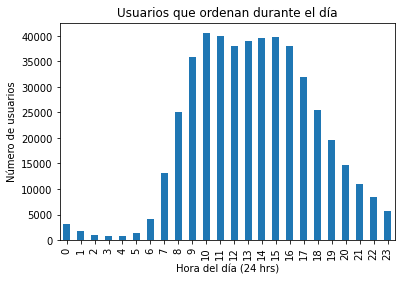

In [ ]:
df_user_id_counts_by_hr = df_insta_orders.groupby(by='order_hour_of_day').count()

display( df_user_id_counts_by_hr)

df_user_id_counts_by_hr['user_id'].plot(title='Usuarios que ordenan durante el día',
                                  kind='bar',
                                  xlabel='Hora del día (24 hrs)' , ylabel='Número de usuarios' )
plt.show()

La mayoría de las personas hacen pedidos entre las 9 y 16 hrs.
El maximo de usuarios realizando pedidos es a las 10 hrs.
Hay menos personas haciendo pedidos entre las 0 y 6 hrs.

### [A3] ¿Qué día de la semana compran víveres las personas?

,order_id,user_id,order_number,order_hour_of_day,days_since_prior_order
order_dow,,,,,
0,84090,84090,84090,84090,84090
1,82185,82185,82185,82185,82185
2,65833,65833,65833,65833,65833
3,60897,60897,60897,60897,60897
4,59810,59810,59810,59810,59810
5,63488,63488,63488,63488,63488
6,62649,62649,62649,62649,62649


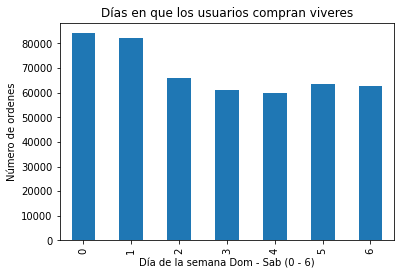

In [ ]:
df_user_id_counts_by_dow = df_insta_orders.groupby(by='order_dow').count()

display( df_user_id_counts_by_dow )

df_user_id_counts_by_dow['order_id'].plot(title='Días en que los usuarios compran viveres',
                                  kind='bar',
                                  xlabel='Día de la semana Dom - Sab (0 - 6)' , ylabel='Número de ordenes' )
plt.show()

La mayoría de compras son el domingo y lunes.
El maximo de compras víveres es el domingo
El minimo de compras víveres es el jueves.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

,order_id,user_id,order_number,order_dow,order_hour_of_day
days_since_prior_order,,,,,
0,38406,38406,38406,38406,38406
1,20179,20179,20179,20179,20179
2,27138,27138,27138,27138,27138
3,30224,30224,30224,30224,30224
4,31006,31006,31006,31006,31006
5,30096,30096,30096,30096,30096
6,33930,33930,33930,33930,33930
7,44577,44577,44577,44577,44577
8,25361,25361,25361,25361,25361


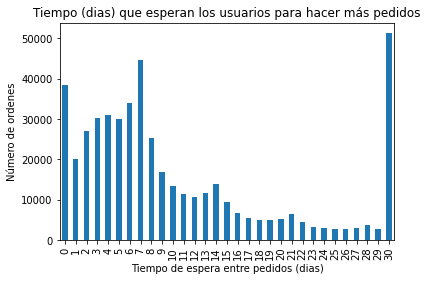

In [ ]:
df_user_id_counts_by_wait_time = df_insta_orders.groupby(by='days_since_prior_order').count()

display( df_user_id_counts_by_wait_time )

df_user_id_counts_by_wait_time['order_number'].plot(
                                title='Tiempo (dias) que esperan los usuarios para hacer más pedidos',
                                  kind='bar',
                                  xlabel='Tiempo de espera entre pedidos (dias)' , ylabel='Número de ordenes' )
plt.show()

La mayoria de las personas esperan 30 días para hacer otro pedido
También es común que esperen 7 días para hacer otro pedido
El tiempo de espera de 0 días, representa la primera orden de cada usuario. Por ser la primera orden tiene 0 días desde la 'ultima' realización de pedido.
(los datos están truncados en 30 y es por esto que la gráfica se visualiza así)


1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [ ]:
df_insta_orders_wed_sat = df_insta_orders.query('order_dow == 3 | order_dow == 6' )



# Filtrar DataFrames y obtener series con numero de ordenes del miercoles y sabado

wed_orders_filtered = df_insta_orders[df_insta_orders['order_dow']== 3]
wed_orders = wed_orders_filtered['order_hour_of_day'].value_counts()


sat_orders_filtered = df_insta_orders[df_insta_orders['order_dow']== 6]
sat_orders = sat_orders_filtered['order_hour_of_day'].value_counts()

# Unir con concat() en un nuevo DataFrame a las series obtenidas para ordenes del mie y sab

order_wed_sat = pd.concat([ wed_orders, sat_orders ], axis = 'columns' )
order_wed_sat.columns=['order_wed', 'order_sat']
display(order_wed_sat)



,order_wed,order_sat
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246
9,4490,4311


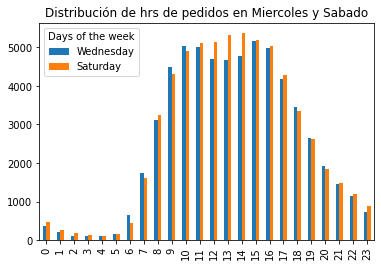

In [ ]:
# Graficar el nuevo DataFrame order_wed_sat

order_wed_sat.plot(title='Distribución de hrs de pedidos en Miercoles y Sabado', kind='bar')

plt.legend(['Wednesday', 'Saturday'], title='Days of the week')
plt.show()


- La distribución para ambos días es bastante similar.
- El sabado hay mas pedidos de 11 a 14 hrs comparado con el miercoles.
- El miercoles hay mas pedidos de 10 a 11 hrs y de 15 a 16 hrs
- Para el miercoles y sabado la distribución es asimétrica negativa (hacia la izquierda).

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [ ]:
orders_per_user = df_insta_orders.groupby('order_number')['user_id'].count()

display(orders_per_user)

order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64

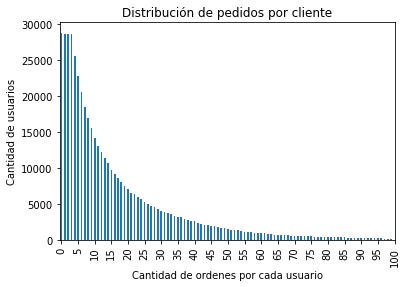

In [ ]:
orders_per_user.plot( title='Distribución de pedidos por cliente', kind='bar', xlabel= 'Cantidad de ordenes por cada usuario',
                    ylabel = 'Cantidad de usuarios', xticks=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])

plt.show()


La mayoria de usuarios realizan de 1 a 5 pedidos
Pocos clientes han realizado mas de 25 pedidos en adelante
Distribución asimétrica positiva (hacia la derecha)

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
# Combinando DataFrames con .merge()

product_data = pd.merge(df_order_products, df_products, on = ['product_id'], how='left')

display( product_data )

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,567889,1560,1,1,Bag Of Ice,37,1
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16
3,491251,8670,35,1,Diced Tomatoes,81,15
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16
...,...,...,...,...,...,...,...
4545002,577211,15290,12,1,Orange Bell Pepper,83,4
4545003,1219554,21914,9,0,Peanut Butter & Jelly Fruit & Nut Food Bar,3,19
4545004,692640,47766,4,1,Organic Avocado,24,4
4545005,319435,691,8,1,Organic Promise Strawberry Fields Cereal,121,14


In [ ]:
# Obtener top 20 de productos mas frecuentes en pedidos

top_20_orders = product_data.groupby(['product_id', 'product_name'] ).count().sort_values('order_id', ascending=False).head(20)
display(top_20_orders)


,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,Banana,66050,66050,66050,66050,66050
13176,Bag of Organic Bananas,53297,53297,53297,53297,53297
21137,Organic Strawberries,37039,37039,37039,37039,37039
21903,Organic Baby Spinach,33971,33971,33971,33971,33971
47209,Organic Hass Avocado,29773,29773,29773,29773,29773
47766,Organic Avocado,24689,24689,24689,24689,24689
47626,Large Lemon,21495,21495,21495,21495,21495
16797,Strawberries,20018,20018,20018,20018,20018
26209,Limes,19690,19690,19690,19690,19690


- La banana es el producto más pedido
- Casi todos los productos más pedidos son frutas y verduras; la leche es la excepción



1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
# Obteniendo los productos (product_id) comprados en cada pedido (order_id)

users_item_group = df_order_products.groupby('order_id')['product_id'].count()

users_item = users_item_group.value_counts()

display( users_item )

5      31923
6      31698
4      31054
7      30822
3      29046
       ...  
80         1
87         1
85         1
72         1
127        1
Name: product_id, Length: 90, dtype: int64

In [ ]:
# Promedio de productos comprados en los pedidos-

print( 'Articulos comprados en promedio por pedido por los usuarios:' )
print( users_item_group.mean() )


Articulos comprados en promedio por pedido por los usuarios:
10.098983215049127


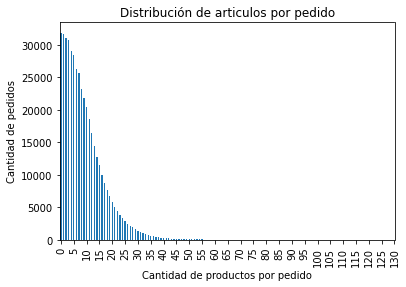

In [ ]:
# Distribución de articulos pedidos por pedido.

users_item.plot(kind= 'bar', title= 'Distribución de articulos por pedido', xlabel= 'Cantidad de productos por pedido',
                    ylabel = 'Cantidad de pedidos', xticks=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130])
plt.show()


Los usuarios compran 10 articulos en promedio por pedido

Son bastante frecuentes los pedidos con menos productos

La distribución es asimétrica positiva (hacia la derecha)

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
# Obteniendo productos que vuelven a pedirse

reordered_products = df_order_products [ df_order_products['reordered'] == 1 ]

display ( reordered_products)


,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
...,...,...,...,...
4544999,1622300,24852,1,1
4545000,1125324,40600,6,1
4545002,577211,15290,12,1
4545004,692640,47766,4,1


In [ ]:
# Combinar DataFrame filtrado con DataFrame de productos

reord_prod_data = pd.merge(reordered_products, df_products, on = ['product_id'], how='left')

# display( reord_prod_data )

In [ ]:
# Agrupar por id y nombre de producto para visualizar el top 20 de articulos que vuelven a pedirse

display ( reord_prod_data.groupby( ['product_id', 'product_name'] ).count().sort_values( by='order_id', ascending=False).head(20) )

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,Banana,55763,55763,55763,55763,55763
13176,Bag of Organic Bananas,44450,44450,44450,44450,44450
21137,Organic Strawberries,28639,28639,28639,28639,28639
21903,Organic Baby Spinach,26233,26233,26233,26233,26233
47209,Organic Hass Avocado,23629,23629,23629,23629,23629
47766,Organic Avocado,18743,18743,18743,18743,18743
27845,Organic Whole Milk,16251,16251,16251,16251,16251
47626,Large Lemon,15044,15044,15044,15044,15044
27966,Organic Raspberries,14748,14748,14748,14748,14748



La gran mayoría del top 20 de productos que se vuelven a pedir son frutas y verduras.

Lo que mas vuelven a pedir los usuarios son las bananas.

El top 10 de este criterio es casi identico al top 10 de los productos mas pedidos



### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
product_data

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,567889,1560,1,1,Bag Of Ice,37,1
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16
3,491251,8670,35,1,Diced Tomatoes,81,15
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16
...,...,...,...,...,...,...,...
4545002,577211,15290,12,1,Orange Bell Pepper,83,4
4545003,1219554,21914,9,0,Peanut Butter & Jelly Fruit & Nut Food Bar,3,19
4545004,692640,47766,4,1,Organic Avocado,24,4
4545005,319435,691,8,1,Organic Promise Strawberry Fields Cereal,121,14


In [ ]:
# Agrupar por id y nombre de producto, con la proporción de los que se vuelven a pedir

(product_data.groupby(['product_id', 'product_name']).agg({'reordered' : 'mean'}).sort_values(by= 'reordered', ascending=False))

,,reordered
product_id,product_name,
14721,Bone Strength Take Care,1.0
20949,Vanilla Sandwich Cookies,1.0
6723,Palmiers- Petite,1.0
6732,Naturally Sparkling Mineral Water,1.0
45088,California Dill Pollen & Garlic Goat Cheese & Olive Oil Infusion,1.0
...,...,...
10485,Caramel Apple Pop,0.0
37690,Calypso Fresh 2X Concentrated ScentSations 166 Loads Liquid Laundry Detergent,0.0
10484,Avocado And Greens,0.0



La tasa de repetición de cada producto nos indica la frecuencia con la que los clientes lo añaden a sus pedidos. Dando importancia a los que tienen mayor tasa de repetición que indica que constatemente se estan pidiendo.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
# Combinar DataFrames con datos de ususario y con datos de producto en uno solo.

user_prods = pd.merge ( df_order_products, df_insta_orders, on = ['order_id'], how='left')
display(user_prods)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8
1,567889,1560,1,1,129474,16,1,13,14
2,2261212,26683,1,1,47476,5,6,9,13
3,491251,8670,35,1,134505,27,6,13,9
4,2571142,1940,5,1,155995,22,5,13,5
...,...,...,...,...,...,...,...,...,...
4545002,577211,15290,12,1,76414,30,2,15,13
4545003,1219554,21914,9,0,163902,19,1,1,3
4545004,692640,47766,4,1,597,3,0,20,30
4545005,319435,691,8,1,7124,6,5,14,24


In [ ]:
# Calculando porcentaje con el promedio.

display( user_prods.groupby('user_id', as_index=False).agg({'reordered': 'mean'} ) )

,user_id,reordered
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571
...,...,...
149621,206203,0.222222
149622,206206,0.714286
149623,206207,0.891304
149624,206208,0.696000



El porcentaje de productos que ya habia pedido previamente en otro pedido cada usuario nos dice cuales usuarios son clientes habituales.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
add_to_car_products = df_order_products [ df_order_products['add_to_cart_order'] == 1 ]

display ( add_to_car_products)


,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
14,1961225,37553,1,1
16,639939,10017,1,1
23,750040,8518,1,0
...,...,...,...,...
4544978,1759009,46175,1,0
4544989,115427,20842,1,1
4544990,2049780,28576,1,1
4544997,2300092,10017,1,0


In [ ]:
add_to_car_prod_data = pd.merge(add_to_car_products, df_products, on = ['product_id'], how='left')

In [ ]:
display ( add_to_car_prod_data.groupby( ['product_id', 'product_name'] ).count().sort_values( by='order_id', ascending=False).head(20) )

,,order_id,add_to_cart_order,reordered,aisle_id,department_id
product_id,product_name,,,,,
24852,Banana,15562,15562,15562,15562,15562
13176,Bag of Organic Bananas,11026,11026,11026,11026,11026
27845,Organic Whole Milk,4363,4363,4363,4363,4363
21137,Organic Strawberries,3946,3946,3946,3946,3946
47209,Organic Hass Avocado,3390,3390,3390,3390,3390
21903,Organic Baby Spinach,3336,3336,3336,3336,3336
47766,Organic Avocado,3044,3044,3044,3044,3044
19660,Spring Water,2336,2336,2336,2336,2336
16797,Strawberries,2308,2308,2308,2308,2308



Saber cuales son los 20 primeros articulos que las personas ponen con mas frecuencia en sus carritos nos indica los productos de mas interes para los usuarios y que son prioridad.

### Conclusion general del proyecto:

El preprocesamiento/limpieza de los datos es un paso muy importante que, ejecutado correctamente, hará el analisis mas confiable. La visualización gráfica de los datos fue sin duda otro elemento clave para comunicar mejor las tendencias en las compras de los usuarios.

Tendencia de compras:
- Se hacen más pedidos entre las 9 y 16 hrs, más en domingo y lunes.
- La mayoría vuelve a comprar semanal y mensualmente, y los que no, entre 1 y 6 dias.
- La gran mayoría pide pocos articulos, en promedio 10 o menos.

Productos mas comprados:
- Los usuarios compran  muchas frutas y verduras, en especial la banana, que en sus 2 presentaciones, encabeza los tops de frecuencia bajo distintos criterios.

- Las métricas de las tasa de repetición son importantes ya que sus resultados pueden tener relación con la calidad y precios de productos o la fuerza de la relación del usuario con la empresa, lo cual habla bien de ella y puede llevar a captar mas clientes.


